In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

plt.rcParams['font.family'] = 'SimHei' #设置字体
plt.rcParams['axes.unicode_minus']=False #坐标轴的负号正常显示

In [9]:
df1 = pd.read_excel('./keypoints(列更名).xlsx', index_col=0)
df1

,0鼻子x,0鼻子y,0鼻子conf,1脖子x,1脖子y,1脖子conf,2右肩x,2右肩y,2右肩conf,3右肘x,...,14右眼conf,15左眼x,15左眼y,15左眼conf,16右耳x,16右耳y,16右耳conf,17左耳x,17左耳y,17左耳conf
0,736.243,559.675,0.650311,830.475,515.602,0.626633,836.309,600.905,0.620409,912.859,...,0.745269,715.530,539.065,0.703324,736.274,583.396,0.082676,715.718,486.126,1.025990
1,733.389,556.792,0.595327,827.553,512.621,0.627159,836.289,597.999,0.622575,912.937,...,0.738161,715.528,536.187,0.680843,736.184,583.247,0.081972,715.726,483.256,1.009070
2,736.235,553.823,0.575404,827.588,509.699,0.646545,833.461,597.945,0.623604,912.921,...,0.746082,715.513,530.359,0.690788,736.364,577.481,0.093948,715.664,480.377,0.980916
3,736.290,550.914,0.625083,830.523,506.793,0.636211,833.518,597.979,0.610875,915.866,...,0.799011,715.566,530.218,0.724259,736.248,577.461,0.106643,715.727,480.187,0.997391
4,733.396,547.957,0.612491,827.561,503.877,0.641337,833.523,589.149,0.565578,912.916,...,0.795002,712.804,527.314,0.707544,727.511,577.271,0.093739,715.656,477.347,1.001560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,698.046,400.791,0.443984,806.982,403.669,0.684251,812.881,480.325,0.637592,889.424,...,0.789635,683.350,383.108,0.559931,701.005,456.791,0.297579,692.245,362.443,0.752677
920,695.089,391.957,0.448315,806.954,403.657,0.686810,812.859,480.303,0.634160,892.257,...,0.702814,680.409,380.169,0.509435,701.050,456.781,0.300898,692.210,362.532,0.764218
921,695.023,392.048,0.437441,806.936,403.665,0.674410,812.898,480.331,0.619241,892.305,...,0.704544,677.530,383.130,0.500821,701.085,456.812,0.278024,692.182,362.562,0.811618
922,695.153,397.869,0.422071,806.932,403.691,0.669535,812.879,480.314,0.633211,892.325,...,0.742179,680.409,386.074,0.510983,706.831,459.559,0.266360,692.187,362.624,0.832441


In [10]:
df = pd.read_excel('./keypoints.xlsx', index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,736.243,559.675,0.650311,830.475,515.602,0.626633,836.309,600.905,0.620409,912.859,...,0.745269,715.530,539.065,0.703324,736.274,583.396,0.082676,715.718,486.126,1.025990
1,733.389,556.792,0.595327,827.553,512.621,0.627159,836.289,597.999,0.622575,912.937,...,0.738161,715.528,536.187,0.680843,736.184,583.247,0.081972,715.726,483.256,1.009070
2,736.235,553.823,0.575404,827.588,509.699,0.646545,833.461,597.945,0.623604,912.921,...,0.746082,715.513,530.359,0.690788,736.364,577.481,0.093948,715.664,480.377,0.980916
3,736.290,550.914,0.625083,830.523,506.793,0.636211,833.518,597.979,0.610875,915.866,...,0.799011,715.566,530.218,0.724259,736.248,577.461,0.106643,715.727,480.187,0.997391
4,733.396,547.957,0.612491,827.561,503.877,0.641337,833.523,589.149,0.565578,912.916,...,0.795002,712.804,527.314,0.707544,727.511,577.271,0.093739,715.656,477.347,1.001560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,698.046,400.791,0.443984,806.982,403.669,0.684251,812.881,480.325,0.637592,889.424,...,0.789635,683.350,383.108,0.559931,701.005,456.791,0.297579,692.245,362.443,0.752677
920,695.089,391.957,0.448315,806.954,403.657,0.686810,812.859,480.303,0.634160,892.257,...,0.702814,680.409,380.169,0.509435,701.050,456.781,0.300898,692.210,362.532,0.764218
921,695.023,392.048,0.437441,806.936,403.665,0.674410,812.898,480.331,0.619241,892.305,...,0.704544,677.530,383.130,0.500821,701.085,456.812,0.278024,692.182,362.562,0.811618
922,695.153,397.869,0.422071,806.932,403.691,0.669535,812.879,480.314,0.633211,892.325,...,0.742179,680.409,386.074,0.510983,706.831,459.559,0.266360,692.187,362.624,0.832441


In [19]:
df_897 = df.iloc[896]
#df_897.iloc[896].values

In [13]:
joints_pair = [[[1,2],[1,5]],
                [[2,3],[5,6]],
                [[3,4],[6,7]],
                [[1,8],[1,11]],
                [[8,9],[11,12]],
                [[9,10],[12,13]]]
bone_title = ['肩','大臂','小臂','躯干','大腿','小腿']

In [14]:
# 计算关节之间的2d距离
def cal_joints_lenths_2d(df, joints_id):
    joint0xy = df.loc[:,[joints_id[0]*3, joints_id[0]*3+1]]
    joint1xy = df.loc[:,[joints_id[1]*3, joints_id[1]*3+1]]
    lengths_2d = ((joint0xy.values - joint1xy.values)**2).sum(axis=1)**(1/2)
    return lengths_2d

In [29]:
# 颈部
len_0 =cal_joints_lenths_2d(df,[0,1])[896]
len_0

115.15538244476457

In [36]:
len_0 =cal_joints_lenths_2d(df,[0,1])[896]
print(len_0)
len_7 = cal_joints_lenths_2d(df,joints_pair[3][1])[896]
print(len_7)
len_8 =  cal_joints_lenths_2d(df,joints_pair[3][0])[896]
print(len_8)
len_9 = cal_joints_lenths_2d(df,joints_pair[4][1])[896]
print(len_9)
len_10 = cal_joints_lenths_2d(df,joints_pair[4][0])[896]
print(len_10)
len_11 =  cal_joints_lenths_2d(df,joints_pair[5][1])[896]
print(len_11)
len_12 = cal_joints_lenths_2d(df,joints_pair[5][0])[896]
print(len_12)

115.15538244476457
290.37570473095707
276.05308747594177
170.77514807488828
156.4796271595764
173.3547297768366
188.43245262958283


In [69]:
# 还原头部加颈部比例
# 头部加颈部/图像中的颈部
neck_ratio = (130+52)/(0.4*130+52)
neck_ratio

1.75

In [70]:
import math
height =len_0*neck_ratio+0.5*(len_8*math.cos(math.pi*(10/180))+len_7*math.cos(math.pi*(7/180)))+0.5*(len_10*math.cos(math.pi*(19/180))+len_9*math.cos(math.pi*(17/180)))+0.5*(len_12*math.cos(math.pi*(13/180))+len_11*math.cos(math.pi*(4/180)))
height

815.4586077687686

In [78]:
# 像素转换为身高单位的H
ratio = 1/height

0.22073468632885015

In [79]:
df_X = pd.read_excel('./X.xlsx', index_col=0)
df_Y =pd.read_excel('./Y.xlsx', index_col=0)
df_Z = pd.read_excel('./Z.xlsx', index_col=0)

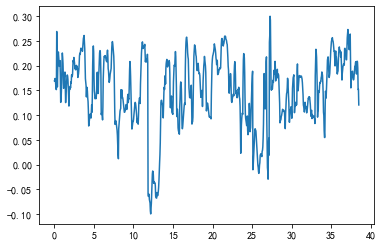

In [83]:
# 以m为单位的A点大致还原
H=1.8
A_Z = df_Z.iloc[:,3]*ratio*H
plt.plot(np.linspace(0,38.5,924),A_Z)

In [77]:
df_chain_rod_length = pd.read_excel('./各链杆相对长度.xlsx', header=None)
df_chain_rod_length

,0,1
0,颈部,107.047150
1,右半肩,73.689402
2,左半肩,69.383811
3,右大臂,129.648036
4,左大臂,128.835822
5,右小臂,128.420872
6,左小臂,128.420872
7,右躯干,304.015938
8,左躯干,334.400809
9,右大腿,154.265493


In [72]:
length_ratio = df_chain_rod_length

In [73]:
length_ratio.iloc[:,1] = df_chain_rod_length.iloc[:,1]/height
length_ratio

,0,1
0,颈部,0.131272
1,右半肩,0.090366
2,左半肩,0.085086
3,右大臂,0.158988
4,左大臂,0.157992
5,右小臂,0.157483
6,左小臂,0.157483
7,右躯干,0.372816
8,左躯干,0.410077
9,右大腿,0.189176


In [74]:
length_ratio.to_excel('各链杆相对长度比例.xlsx', header=False)